<a href="https://colab.research.google.com/github/YaninaDitz/Coder/blob/main/Visualizaci%C3%B3n%2BDITZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predecir la pérdida de clientes

## Librerias

Importamos las librerias requeridas para este trabajo

In [72]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

##Importar la data y previsualización

In [73]:
df_bank=pd.read_csv('https://raw.githubusercontent.com/YaninaDitz/Coder/main/BankChurners.csv')
df_bank.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


## Información de los atributos


In [74]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

1 CLIENTNUM: ID para cada cliente. (Integer)

2 Attrition_Flag: Marca que indica si el cliente produce o no. (Boolean)

3 Customer_Age: Edad del cliente. (Integer)

4 Gender: Género del cliente. (String)

5 Dependent_count: Cantidad de personas a cargo que tiene. (Integer)

6 Education_Level: Nivel de educación del cliente. (String)

7 Marital_Status: Estado civil del cliente. (String)

8 Income_Category: Categoría de ingresos del cliente. (String)

9 Card_Category: Tipo de tarjeta del cliente. (String)

10 Months_on_book:Cuánto tiempo el cliente ha estado en los libros (Integer)

11 Total_Relationship_Count: Número total de relaciones que el cliente tiene con el proveedor de la tarjeta de crédito. (Integer)

12 Months_Inactive_12_mon: Número de meses que el cliente ha estado inactivo en los últimos doce meses. (Integer)

13 Contacts_Count_12_mon:Número de contactos que ha tenido el cliente en los últimos doce meses. (Integer)

14 Credit_Limit: Límite de crédito del cliente. (Integer)

15 Total_Revolving_Bal: Saldo renovable total del cliente. (Integer)

16 Avg_Open_To_Buy: Ratio medio de apertura a la compra del cliente. (Integer)

17 Total_Amt_Chng_Q4_Q1: Importe total cambiado del trimestre 4 al trimestre 1. (Integer)

18 Total_Trans_Amt: Importe total de transacciones. (Integer)

19 Total_Trans_Ct: Número total de transacciones. (Integer)

20 Total_Ct_Chng_Q4_Q1: El recuento total cambió del cuarto al primer trimestre. (Integer)

21 Avg_Utilization_Ratio: Ratio medio de utilización del cliente. (Integer)

22 Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mo n_Dependent_count_Education_Level_Months_Inactive_12_mon_1: Clasificador de Naive Bayes para predecir si alguien se dará de baja o no en función de características dadas

Cambiamos el nombre a algunos campos para que sea más entendible

In [75]:
df_bank.rename(columns={
    'CLIENTNUM': 'Client_Num',
    'Dependent_count': 'Dependent_Count',
    'Months_on_book': 'Months_on_Book',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1': 'Naive_Bayes_Classifier_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2': 'Naive_Bayes_Classifier_2'
}, inplace=True)

df_bank.head()

,Client_Num,Attrition_Flag,Customer_Age,Gender,Dependent_Count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_Book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_1,Naive_Bayes_Classifier_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


Se elimina el siguiente campo, ya que no es necesario para el EDA.

In [76]:
df_bank.drop(columns=['Client_Num'],inplace=True)

## Análisis descriptivo

In [77]:
df_bank.describe()

,Customer_Age,Dependent_Count,Months_on_Book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_1,Naive_Bayes_Classifier_2
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


Hacemos un análisis descriptivo de las variables categoricas.

In [78]:
df_bank.describe(include=['O'])

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


### Visualización de las variables

Nuestro principal interés es obtener un entendimiento de cómo los atributos dados se relacionan con el status "Existing Customer"

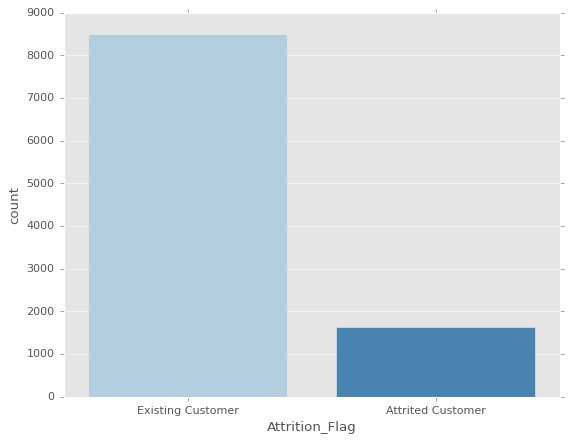

In [79]:
sns.countplot(x='Attrition_Flag',data=df_bank,palette='Blues' );


Analizamos la edad de los clientes:

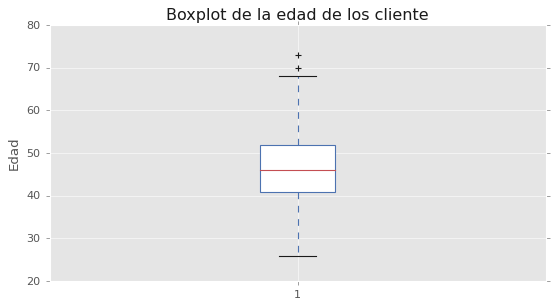

In [80]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.boxplot(x=df_bank['Customer_Age'],patch_artist=True)
ax.set_title('Boxplot de la edad de los cliente')
ax.set_ylabel('Edad')
plt.show()

Analizar el género vs. estado civil

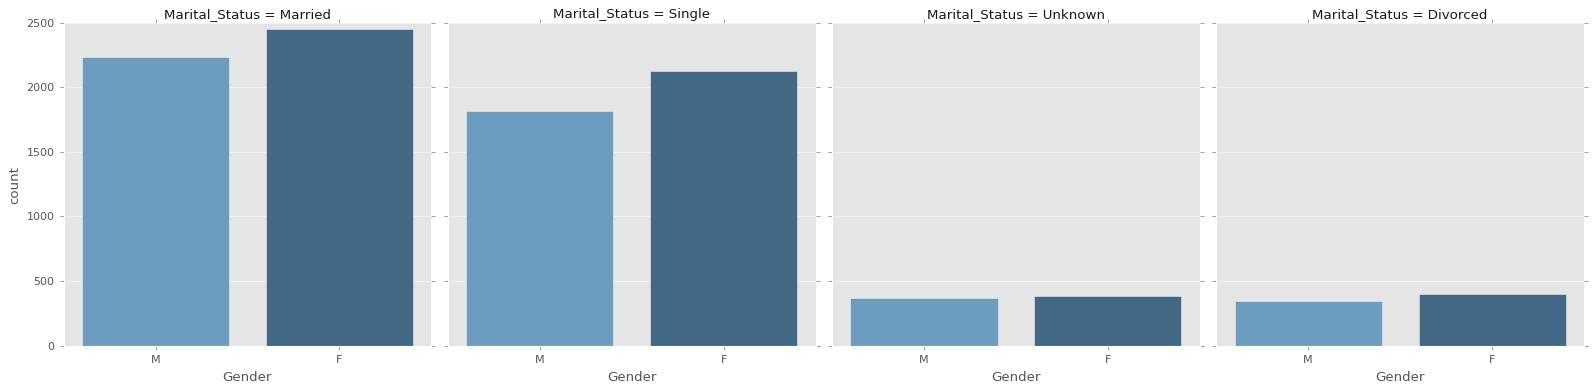

In [81]:
sns.catplot(x='Gender',data=df_bank,palette='Blues_d',kind='count',col='Marital_Status');


Nivel de educación 

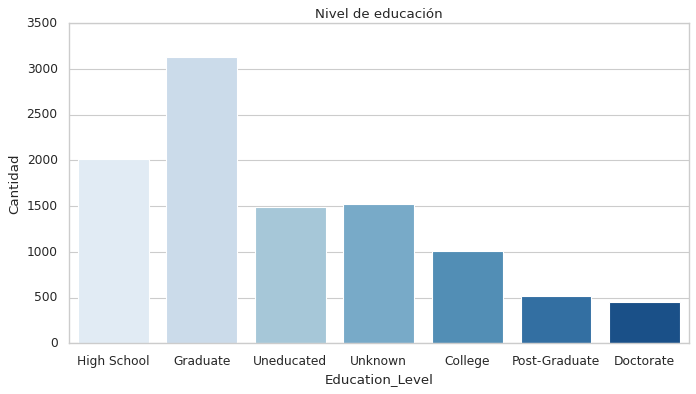

In [97]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x='Education_Level',data=df_bank,palette='Blues')
ax.set_title('Nivel de educación')
ax.set_ylabel('Cantidad')
plt.show()


Hay que hacer foco sobre los graduados.

Analizar la relación que hay entre un cliente exististen o no y sus ingresos.

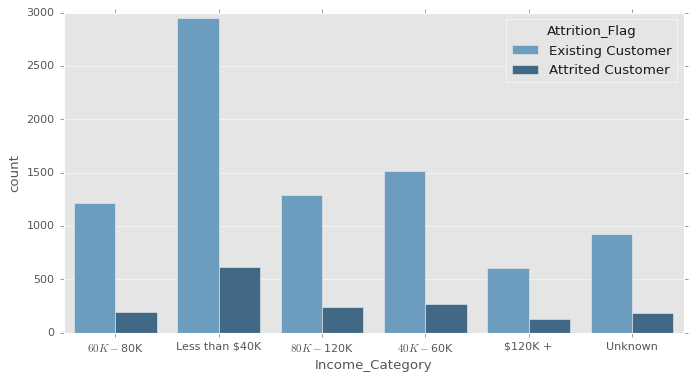

In [83]:
plt.figure(figsize=(10,5))
sns.countplot(x='Income_Category',data=df_bank,palette='Blues_d',hue='Attrition_Flag');

Se analiza el tipo de tarjeta que es más usada:

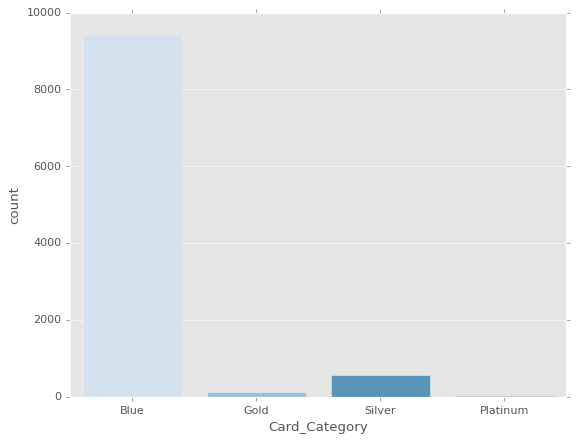

In [84]:
sns.countplot(data=df_bank, x="Card_Category", palette='Blues')
sns.set_theme(style="whitegrid")

Se analiza la cantidad de meses que están los clientes

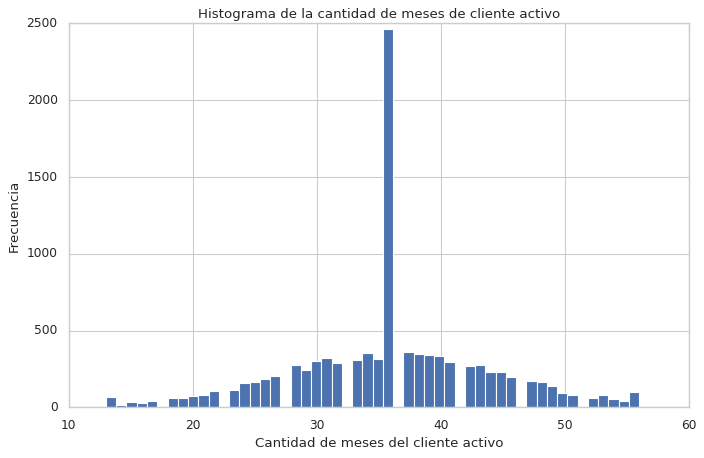

In [85]:
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(df_bank['Months_on_Book'],bins=52, density=False)
ax.set_xlabel('Cantidad de meses del cliente activo')
ax.set_ylabel('Frecuencia')
ax.set_title('Histograma de la cantidad de meses de cliente activo')
plt.show()

Cantidad total de relaciones:

<Axes: >

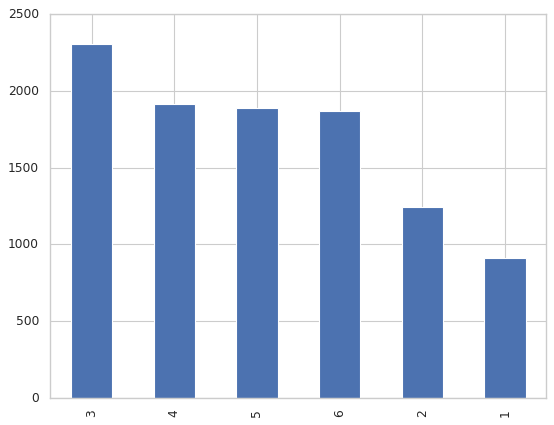

In [86]:
df_bank.Total_Relationship_Count.value_counts().plot(kind='bar')


El siguiente gráfico nos permite ver si la cantidad de realaciones que tiene un cliente son afectafadas por el status.

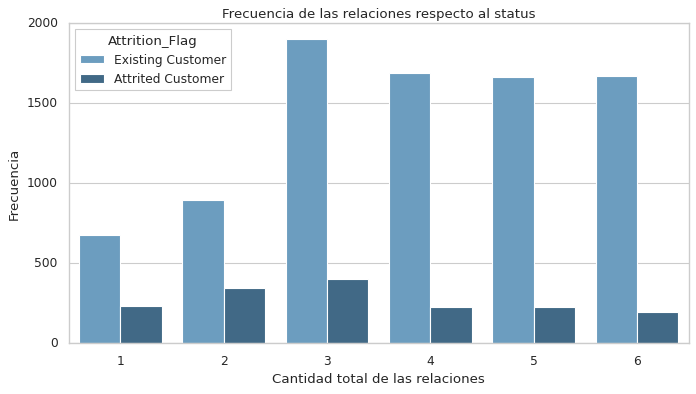

In [87]:
plt.figure(figsize=(10,5))
sns.countplot(x='Total_Relationship_Count',data=df_bank,palette='Blues_d',hue='Attrition_Flag')
plt.title('Frecuencia de las relaciones respecto al status')
plt.xlabel('Cantidad total de las relaciones')
plt.ylabel('Frecuencia')
plt.show()

Contacts_Count_12_mon VS. Months_Inactive_12_mon

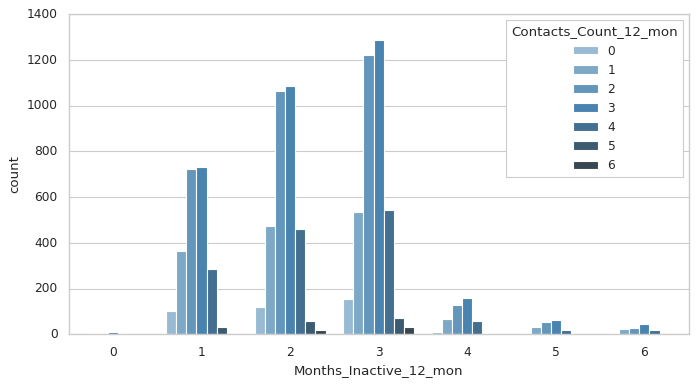

In [88]:
plt.figure(figsize=(10,5))
sns.countplot(x='Months_Inactive_12_mon',data=df_bank,palette='Blues_d',hue='Contacts_Count_12_mon')
plt.show()

Distribución del límite del credito del cliente

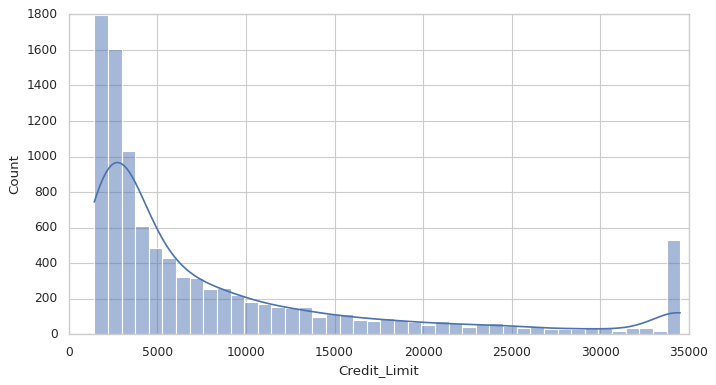

In [89]:
plt.figure(figsize=(10,5))
sns.histplot(x='Credit_Limit',data=df_bank,kde=True)
plt.show()

 Importe total cambiado del trimestre 4 al trimestre 1 vs. El recuento total de cambio del cuarto al primer trimestre

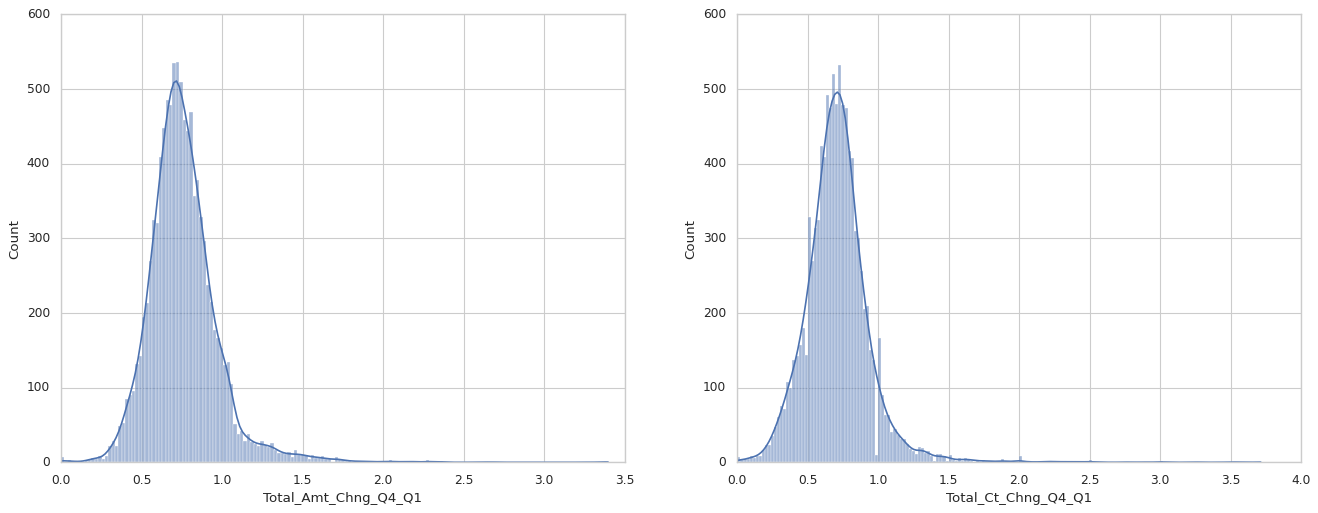

In [90]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,7))
sns.histplot(x='Total_Amt_Chng_Q4_Q1',data=df_bank,kde=True,ax=ax[0])
sns.histplot(x='Total_Ct_Chng_Q4_Q1',data=df_bank,kde=True,ax=ax[1]);

Importe total de transacciones  VS. cantidad total de transacciones

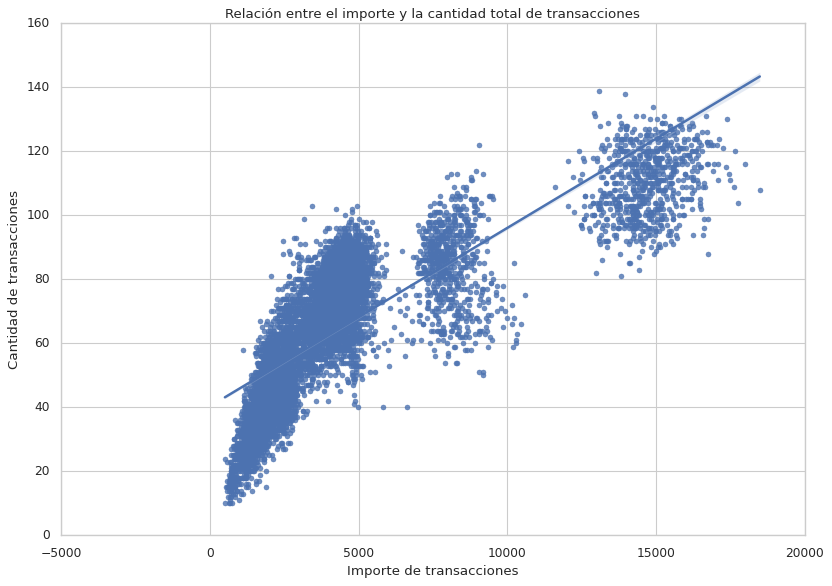

In [96]:
plt.figure(figsize=(12,8))
sns.regplot(x='Total_Trans_Amt',y='Total_Trans_Ct',data=df_bank)
plt.title('Relación entre el importe y la cantidad total de transacciones')
plt.xlabel('Importe de transacciones')
plt.ylabel('Cantidad de transacciones')
plt.show()

Tasa promedio de la utilizacion del cliente:

Text(0, 0.5, 'Frecuencia')

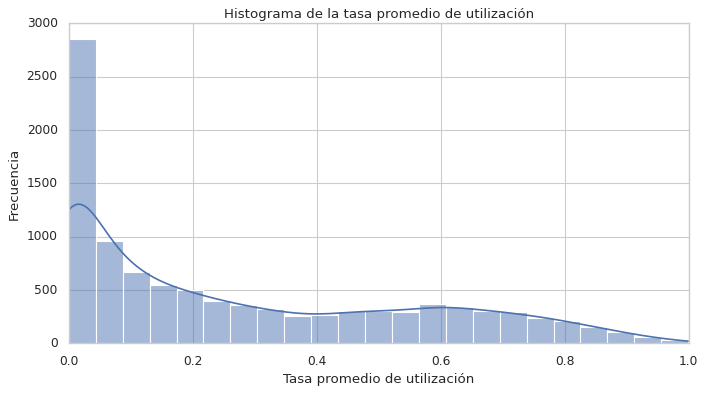

In [92]:
plt.figure(figsize=(10,5))
sns.histplot(x='Avg_Utilization_Ratio',data=df_bank,kde=True)
plt.title('Histograma de la tasa promedio de utilización')
plt.xlabel('Tasa promedio de utilización')
plt.ylabel('Frecuencia')